In [1]:
import pandas as pd

import numpy as np


In [2]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("data.csv")
df = df.drop(columns="Unnamed: 0")

In [5]:
df

,Study.Group,Age,Gender,Creatinine,Urea,eGFR,"Cyclotrisiloxane, hexamethyl-",Benzaldehyde,"Cyclopentasiloxane, decamethyl-",Styrene,...,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Anaerovoracaceae;g__Fimisoma;s__Fimisoma sp002320005,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__Acutalibacter;s__Acutalibacter sp904374805,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Dysgonomonadaceae;g__Dysgonomonas;s__Dysgonomonas sp001261715,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Selenomonadales;f__Selenomonadaceae;g__Megamonas;s__Megamonas funiformis,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__P3;g__UBA1711;s__UBA1711 sp900318275,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Murimonas;s__Murimonas intestini,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes;s__Alistipes sp910576555,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Weeksellaceae;g__Chryseobacterium;s__Chryseobacterium sp008274625,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__CAJFPI01;s__CAJFPI01 sp904420145,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella sp002393725
0,0,0.788462,0,0.007258,0.081674,0.758772,0.030590,0.005610,0.010584,0.022359,...,0.001166,0.000150,0.000000,0.001055,0.0,0.002822,0.012543,0.000000,0.007954,0.000000
1,0,0.769231,0,0.023075,0.079122,0.520911,0.178306,0.029835,0.039570,0.094301,...,0.004102,0.000000,0.523376,0.000648,0.0,0.006996,0.000956,0.000000,0.054927,0.000000
2,0,0.750000,0,0.008684,0.063808,0.759509,0.166160,0.030871,0.039827,0.079596,...,0.001666,0.000351,0.079738,0.001514,0.0,0.002285,0.000000,0.000000,0.000000,0.000000
3,0,0.480769,0,0.004652,0.063808,0.873925,0.061980,0.067373,0.029793,0.120274,...,0.004031,0.001796,0.000000,0.036149,0.0,0.001136,0.141704,0.000000,0.245679,0.019044
4,0,0.461538,0,0.005025,0.061256,0.876863,0.049402,0.009097,0.019120,0.075918,...,0.007884,0.000281,0.501067,0.000024,0.0,0.001158,0.050614,0.028015,0.035293,0.042552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,1,0.250000,0,0.443583,0.514293,0.023574,0.110972,0.033379,0.038875,0.214923,...,0.011411,0.001139,0.022421,0.012143,0.0,0.002705,0.019420,0.054757,0.111702,0.090231
283,1,0.307692,1,0.795918,0.520419,0.008539,0.037900,0.118183,0.014586,0.040391,...,0.001163,0.000528,0.000000,0.002749,0.0,0.001558,0.016156,0.000000,0.000000,0.013055
284,1,0.269231,1,0.955338,0.704696,0.003214,0.049098,0.022596,0.016571,0.035747,...,0.002986,0.000808,0.525754,0.001286,0.0,0.003789,0.000000,0.000000,0.011401,0.000000
285,1,0.250000,0,0.706594,0.674834,0.005138,1.000000,0.019771,0.546953,1.000000,...,0.006928,0.002080,0.075771,0.001306,0.0,0.002013,0.028758,0.000000,0.103815,0.000000


In [6]:
df["Propionic acid"]

0      6.316479e-10
1      7.348995e-02
2      3.889751e-02
3      2.727855e-02
4      1.370614e-02
           ...     
282    2.005221e-09
283    9.261160e-10
284    8.745632e-10
285    2.200859e-08
286    2.782057e-09
Name: Propionic acid, Length: 287, dtype: float64

In [7]:
X = df[["1,7-Di(3-ethylphenyl)-2,2,4,4,6,6-hexamethyl-1,3,5,7-tetraoxa-2,4,6-trisilaheptane", "Pentadecanal", "Propionic acid", "Methyl butyrate", "Methyl propionate"]].values
y = df["Study.Group"].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [9]:
from tensorflow.keras.layers import Embedding, Input, LSTM, Dense
from tensorflow.keras.models import Model

In [10]:
class EncoderDecoderModel(Model):
    def __init__(self):
        super(EncoderDecoderModel, self).__init__()
        self.encoder = tf.keras.Sequential([
            Dense(32, activation="relu"),
            Dense(16, activation="relu"),
            Dense(8, activation="relu")
        ])
        self.decoder = tf.keras.Sequential([
            Dense(16, activation="relu"),
            Dense(32, activation="relu"),
            Dense(128, activation="sigmoid")
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded



In [11]:
model = EncoderDecoderModel()

In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.MSE)


In [13]:
import matplotlib.pyplot as plt

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle=True, batch_size=32, epochs=20)

Epoch 1/20
8/8 [==============================] - 0s 10ms/step - loss: 0.2495 - val_loss: 0.2487
Epoch 2/20
8/8 [==============================] - 0s 2ms/step - loss: 0.2481 - val_loss: 0.2471
Epoch 3/20
8/8 [==============================] - 0s 2ms/step - loss: 0.2465 - val_loss: 0.2450
Epoch 4/20
8/8 [==============================] - 0s 2ms/step - loss: 0.2441 - val_loss: 0.2421
Epoch 5/20
8/8 [==============================] - 0s 2ms/step - loss: 0.2409 - val_loss: 0.2381
Epoch 6/20
8/8 [==============================] - 0s 2ms/step - loss: 0.2361 - val_loss: 0.2321
Epoch 7/20
8/8 [==============================] - 0s 2ms/step - loss: 0.2292 - val_loss: 0.2232
Epoch 8/20
8/8 [==============================] - 0s 2ms/step - loss: 0.2194 - val_loss: 0.2103
Epoch 9/20
8/8 [==============================] - 0s 2ms/step - loss: 0.2059 - val_loss: 0.1930
Epoch 10/20
8/8 [==============================] - 0s 2ms/step - loss: 0.1878 - val_loss: 0.1706
Epoch 11/20
8/8 [=====================

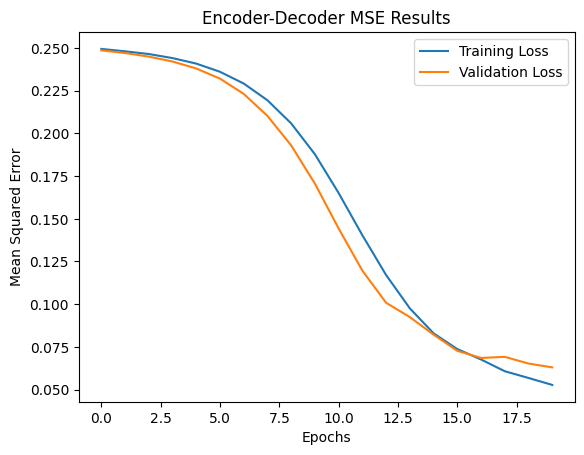

In [15]:

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Encoder-Decoder MSE Results")
plt.legend()
plt.show()

In [16]:
print(history.history["loss"])

[117458056.0, 116250200.0, 114223248.0, 110442584.0, 103582032.0, 92591400.0, 73326776.0, 47028620.0, 23973312.0, 8635390.0, 3292619.25, 1279254.75, 631843.8125, 392949.34375, 298064.03125, 234972.15625, 201097.125, 175647.546875, 156385.984375, 141007.359375]


In [17]:
model.summary()

Model: "encoder_decoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 8)                 856       
                                                                 
 sequential_1 (Sequential)   (None, 128)               4912      
                                                                 
Total params: 5768 (22.53 KB)
Trainable params: 5768 (22.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
